# **Machine Learning for solving the characterization of Dark Energy**
## Model selection phase
#### *Phd. Alberto Hernandez Almada | CSs. Ivan Yahir Gomez Mancilla*
#### *Verano de la Ciencia Region Centro 2023*

##### Imports

General Imports

In [15]:
import pandas
import numpy
import matplotlib.pyplot as plt

Machine Learning Imports

In [16]:
from sklearn.model_selection import train_test_split # Splitting data to training and test data
from sklearn.linear_model import ( # Linear regression model regressors
    LinearRegression,
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
)
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

##### Data set load

In [90]:
# To use a different data set just change the txt file name to any of: hz_com, hz_da, hz_dl
data = pandas.read_csv('DataBases\hz_dl.txt', sep = ' ', comment = '#') # Reading from a txt file, each column separated by a single blank space
del data[data.columns[-1]] # Deleting last column (trash column)

print(data)

         x       y  error
0   0.0700   69.00  19.60
1   0.1000   69.00  12.00
2   0.1200   68.60  26.20
3   0.1700   83.00   8.00
4   0.1791   75.00   4.00
5   0.1993   75.00   5.00
6   0.2000   72.90  29.60
7   0.2400   82.37   3.94
8   0.2700   77.00  14.00
9   0.2800   88.80  36.60
10  0.3000   78.83   6.58
11  0.3100   78.39   5.46
12  0.3500   88.10   9.45
13  0.3519   83.00  14.00
14  0.3600   80.16   4.37
15  0.3800   81.74   3.40
16  0.3802   83.00  13.50
17  0.4000   95.00  17.00
18  0.4004   77.00  10.20
19  0.4247   87.10  11.20
20  0.4300   89.36   4.89
21  0.4400   85.48   8.59
22  0.4497   92.80  12.90
23  0.4700   89.00  34.00
24  0.4783   80.90   9.00
25  0.4800   97.00  62.00
26  0.5100   90.67   3.66
27  0.5200   94.61   4.20
28  0.5600   93.59   3.96
29  0.5700   96.59   8.76
30  0.5900   98.75   4.66
31  0.5929  104.00  13.00
32  0.6000   90.96   7.04
33  0.6100   97.59   3.97
34  0.6400   99.09   4.53
35  0.6797   92.00   8.00
36  0.7300  100.69   8.03
37  0.7812  

##### Data Split

In [91]:
# Data splited by 90% training and 10% testing. To change percentage modify test_size parameter
xTrain, xTest, yTrain, yTest = train_test_split(data['x'], data['y'], test_size = 0.1, random_state = 2) 

print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(45,) (45,)
(6,) (6,)


##### Linear Regression Models

Model Training: Creation of linear regression models using simple, Theil Sen, RANSAC and Huber regressors and training each model

In [92]:
regLin = LinearRegression()
regLin.fit(xTrain.to_numpy().reshape(-1, 1), yTrain)

regTS = TheilSenRegressor()
regTS.fit(xTrain.to_numpy().reshape(-1, 1), yTrain)

regRan = RANSACRegressor()
regRan.fit(xTrain.to_numpy().reshape(-1, 1), yTrain)

regHub = HuberRegressor()
regHub.fit(xTrain.to_numpy().reshape(-1, 1), yTrain)

HuberRegressor()

Prediction: Generation of predictions using each one of the regressors for the linear regression model

In [93]:
yPredLin = regLin.predict(xTest.to_numpy().reshape(-1, 1))

yPredTS = regTS.predict(xTest.to_numpy().reshape(-1, 1))

yPredRan = regRan.predict(xTest.to_numpy().reshape(-1, 1))

yPredHub = regHub.predict(xTest.to_numpy().reshape(-1, 1))

Model Evaluation: Evaluated by R^2 regression score function (1.0 best achivable score)

In [94]:
print(r2_score(yPredLin, yTest))

print(r2_score(yPredTS, yTest))

print(r2_score(yPredRan, yTest))

print(r2_score(yPredHub, yTest))

0.9705277318329928
0.9213997615588474
0.6361218012532401
0.9707820881036185


Plot: Plotting showing the data below
- Black points: training data
- Red points: testing data
- Lines: regression function found by each regressor

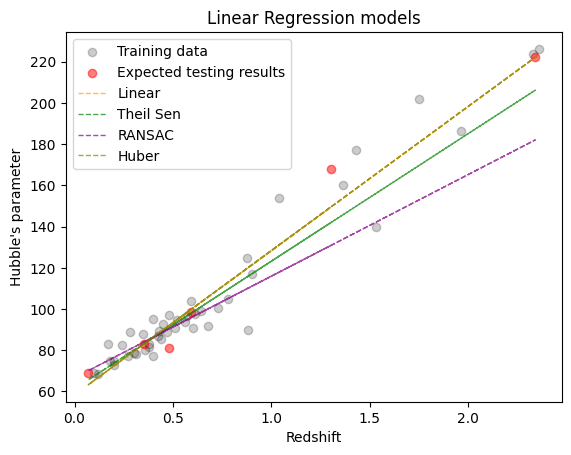

In [95]:
plt.scatter(xTrain, yTrain, color = "black", alpha = 0.2, label = "Training data")
plt.scatter(xTest, yTest, color = "red", alpha = 0.5, label = "Expected testing results")

plt.plot(xTest, yPredLin, color = "orange", linestyle = "dashed", alpha = 0.7, linewidth = 1, label = 'Linear')
plt.plot(xTest, yPredTS, color = "green", linestyle = "dashed", alpha = 0.7, linewidth = 1, label = 'Theil Sen')
plt.plot(xTest, yPredRan, color = "purple", linestyle = "dashed", alpha = 0.7, linewidth = 1, label = 'RANSAC')
plt.plot(xTest, yPredHub, color = "olive", linestyle = "dashed", alpha = 0.7, linewidth = 1, label = 'Huber')

plt.legend()
plt.title("Linear Regression models")
plt.xlabel("Redshift")
plt.ylabel("Hubble's parameter")

plt.show()

##### Polynomial Regression

Polynomial declaration: Selection of number of degrees to be used for polynomial funtion and transforming data to be usable

In [107]:
polyFeatures = PolynomialFeatures(degree = 6, include_bias = False) # To change degree of polynomial function change degree parameter

xPolyTrain = polyFeatures.fit_transform(xTrain.to_numpy().reshape(-1,1)) # xTrain data polynomial transformation
xPolyTest = polyFeatures.fit_transform(xTest.to_numpy().reshape(-1,1)) # xTest data polynomial transformation

Model Training: Creation and training of linear regression model with simple regressor based on polynomial data

In [108]:
regPoly = LinearRegression()
regPoly.fit(xPolyTrain, yTrain)

LinearRegression()

Prediction: Obtention of predicted values by testing data

In [109]:
yPredPoly = regPoly.predict(xPolyTest)

Model Evaluation: Evaluated by R^2 regression score function (1.0 best achivable score). Polynomial function coefficients are also displayed

In [110]:
print(r2_score(yPredPoly, yTest))
print(regPoly.coef_)

0.9841579257512546
[ 219.08585035 -613.45321429  934.95379554 -645.02609382  205.11592254
  -24.43545528]


Plot: Predicted data transformation to be plotable and plotting showing the aspecs below
- Black points: Training Data
- Red points: Testing Data
- Blue line: Predicted fit data

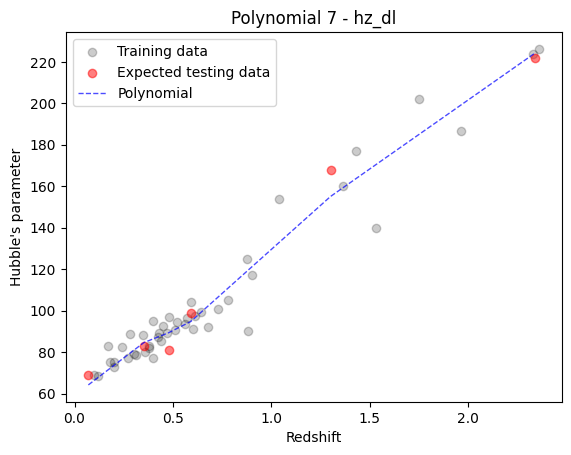

In [111]:
plt.scatter(xTrain, yTrain, color = "black", alpha = 0.2, label = "Training data")
plt.scatter(xTest, yTest, color = "red", alpha = 0.5, label = "Expected testing data")

# Predicted data transformation
polyRes = pandas.DataFrame()
polyRes['x'] = xTest
polyRes['y'] = yPredPoly
polyRes = polyRes.sort_values(by = ['x'])

plt.plot(polyRes['x'], polyRes['y'], color = "Blue", linestyle = "dashed", alpha = 0.7, linewidth = 1, label = "Polynomial")

plt.legend()
plt.title("Polynomial 7 - hz_dl")
plt.xlabel("Redshift")
plt.ylabel("Hubble's parameter")

plt.show()

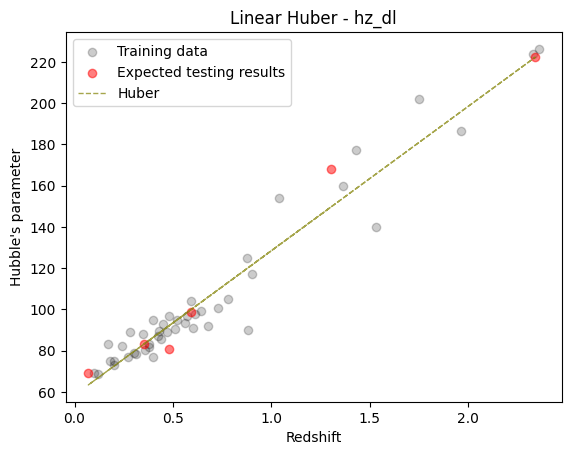

In [112]:
plt.scatter(xTrain, yTrain, color = "black", alpha = 0.2, label = "Training data")
plt.scatter(xTest, yTest, color = "red", alpha = 0.5, label = "Expected testing results")

#plt.plot(xTest, yPredLin, color = "orange", linestyle = "dashed", alpha = 0.7, linewidth = 1, label = 'Linear')
#plt.plot(xTest, yPredTS, color = "green", linestyle = "dashed", alpha = 0.7, linewidth = 1, label = 'Theil Sen')
#plt.plot(xTest, yPredRan, color = "purple", linestyle = "dashed", alpha = 0.7, linewidth = 1, label = 'RANSAC')
plt.plot(xTest, yPredHub, color = "olive", linestyle = "dashed", alpha = 0.7, linewidth = 1, label = 'Huber')

plt.legend()
plt.title("Linear Huber - hz_dl")
plt.xlabel("Redshift")
plt.ylabel("Hubble's parameter")

plt.show()